<a href="https://colab.research.google.com/github/banala-surekha/project1/blob/main/movierate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# read the dataset into a dataframe
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1')
# show first five records of dataframe
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# show the number of records and observations in the dataframe
df.shape

(15509, 10)

In [ ]:
# check out the information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
# check out the missing values in each observation
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
# drop records with missing value in any of the following columns: Name, Year, Duration, Votes, Rating
df.dropna(subset=['Name', 'Year', 'Duration', 'Votes', 'Rating'], inplace=True)

# check the missing values in each observation again
df.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

In [ ]:
# remove rows with duplicate movie records
df.drop_duplicates(subset=['Name', 'Year', 'Director'], keep='first', inplace=True)

In [ ]:
# remove () from the Year column values and change the datatype to integer
df['Year'] = df['Year'].str.strip('()').astype(int)

In [ ]:
# remove minutes from the Duration column values
df['Duration'] = df['Duration'].str.replace(r' min', '').astype(int)
# remove commas from Votes column and convert to integer
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)

# show the number of records and observations after cleaning the dataframe
df.shape

(5850, 10)

In [ ]:
# show the info on the cleaned dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5850 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5850 non-null   object 
 1   Year      5850 non-null   int64  
 2   Duration  5850 non-null   int64  
 3   Genre     5819 non-null   object 
 4   Rating    5850 non-null   float64
 5   Votes     5850 non-null   int64  
 6   Director  5849 non-null   object 
 7   Actor 1   5775 non-null   object 
 8   Actor 2   5733 non-null   object 
 9   Actor 3   5687 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 502.7+ KB


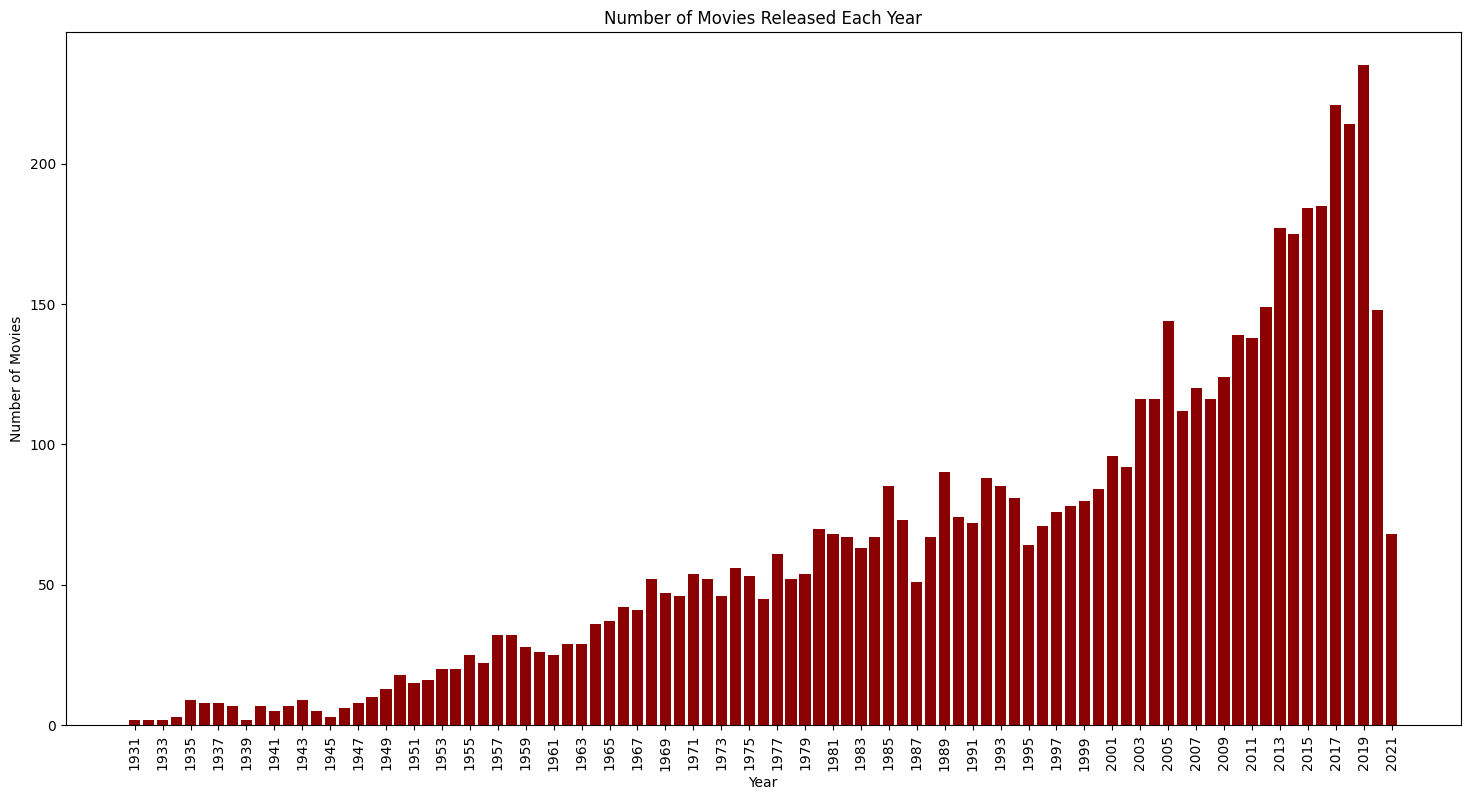

In [ ]:
# group the data by Year and count the number of movies in each year
yearly_movie_counts = df['Year'].value_counts().sort_index()

# create a bar chart
plt.figure(figsize=(18, 9))
plt.bar(yearly_movie_counts.index, yearly_movie_counts.values, color='darkred')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')

# Show every second year on the x-axis and rotate x-labels for better readability
plt.xticks(yearly_movie_counts.index[::2], rotation=90)


plt.show()

In [ ]:
# create dummy columns for each genre
dummies = df['Genre'].str.get_dummies(', ')
# creating a new dataframe which combines df and dummies
df_genre = pd.concat([df, dummies], axis=1)
genre_columns = df_genre.columns[10:]  # Assuming genre columns start from the 11th column
genre_columns

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport',
       'Thriller', 'War', 'Western'],
      dtype='object')

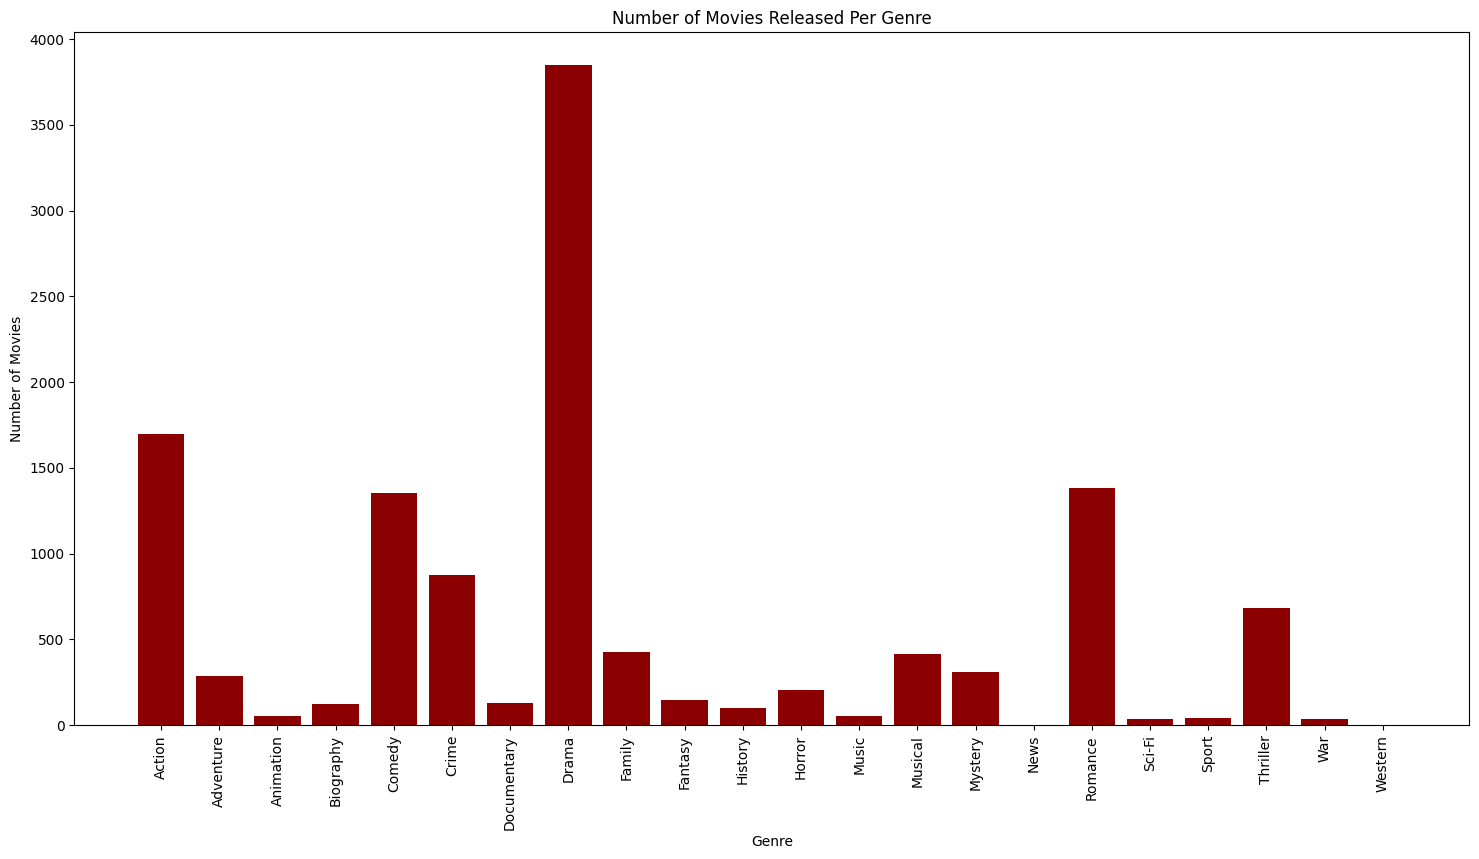

In [ ]:
# group the data by genre_columns and count the number of movies in each genre
genre_movie_counts = df_genre[genre_columns].sum().sort_index()

# create a bar chart
plt.figure(figsize=(18, 9))
plt.bar(genre_movie_counts.index, genre_movie_counts.values, color='darkred')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Genre')

plt.xticks(rotation=90)


plt.show()

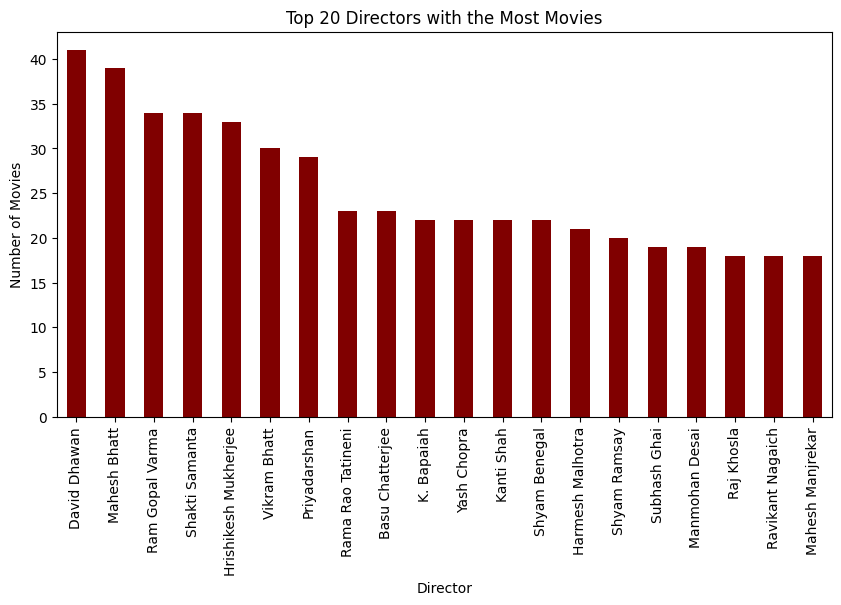

In [ ]:
# Analyzing count of movies of each director
director_movie_counts = df['Director'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 5))
bars = director_movie_counts.head(20).plot(kind='bar', color='maroon')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 20 Directors with the Most Movies')
plt.xticks(rotation=90)

# Add count labels on top of the bars

plt.show()

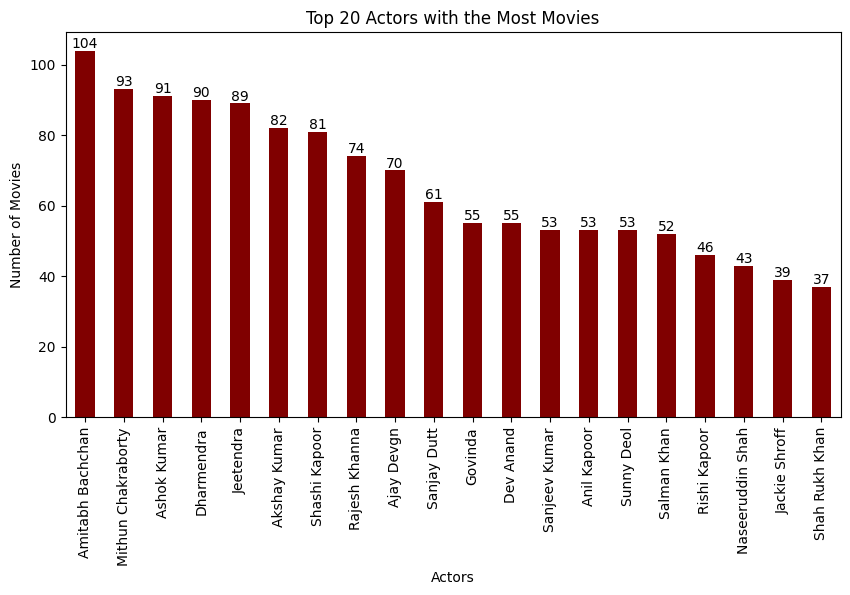

In [ ]:
# To Count Top 20 movies for each actor
actor_movie_counts = df['Actor 1'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 5))
actor_movie_counts.head(20).plot(kind='bar', color='maroon')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.title('Top 20 Actors with the Most Movies')
plt.xticks(rotation=90)

# Add count labels on top of the bars
for i, v in enumerate(actor_movie_counts.head(20)):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

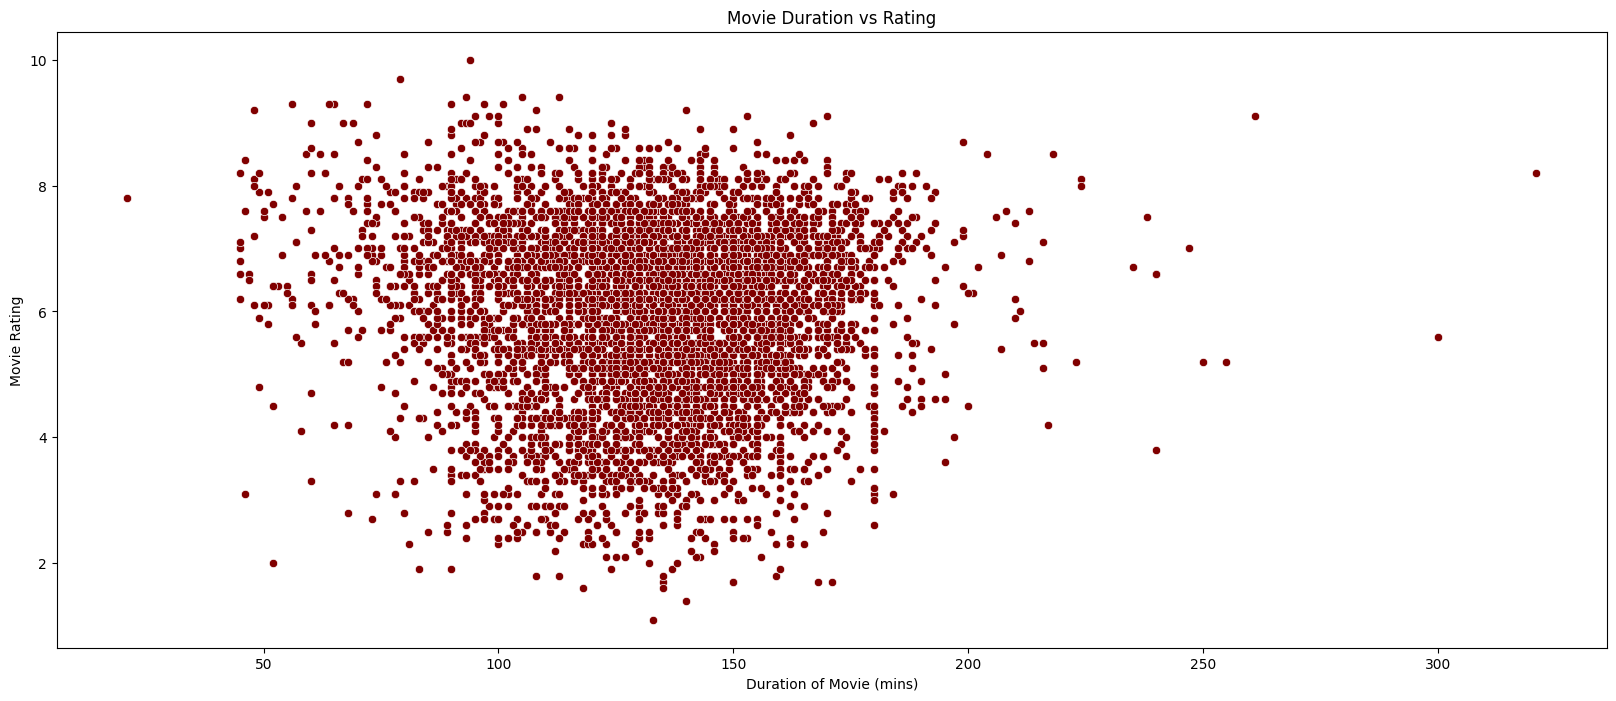

In [ ]:
plt.figure(figsize=(20, 8))
# create a scatter plot with Duration and Rating relationship
sns.scatterplot(x=df['Duration'], y=df['Rating'],  color = 'maroon')
plt.xlabel('Duration of Movie (mins)')
plt.ylabel('Movie Rating')
plt.title('Movie Duration vs Rating')
plt.show()